In [1]:
import numpy as np
from scipy.fft import fft, fftfreq, fftshift
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('vibrations.csv')
nRow, nCol = df.shape

In [3]:
N = nRow                # Número de puntos de muestra
T = 1.0/24000           # espaciado de muestras
x = T*np.arange(0, N)   #Genera un conjunto de números(min,max,incremento) incremento 1 por default

In [4]:
y = df['mm'].to_numpy()
yf = fft(y)                     #Transformada rapida de fourier
xf = fftfreq(N, T)[:N//2]       #Valores de frecuencia

In [7]:
Ampli = 2.0/N * np.abs(yf[0:N//2])     #Amplitud
RMS = Ampli * 0.7071                   #mm/s RMS

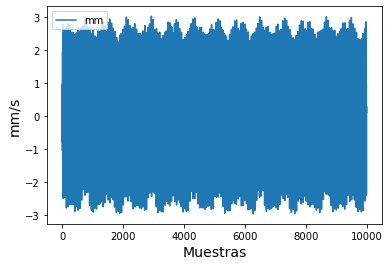

In [10]:
df.plot()
plt.xlabel('Muestras', fontsize='14')
plt.ylabel('mm/s', fontsize='14')
plt.show()

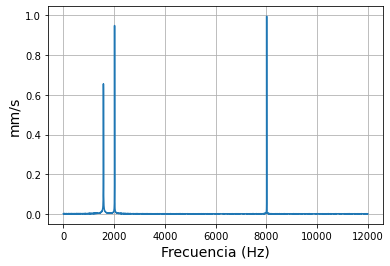

In [11]:
plt.plot(xf, Ampli)
plt.xlabel('Frecuencia (Hz)', fontsize='14')
plt.ylabel('mm/s', fontsize='14')
plt.grid()
plt.show()

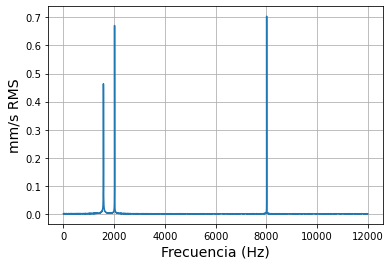

In [6]:
plt.plot(xf, RMS)
plt.xlabel('Frecuencia (Hz)', fontsize='14')
plt.ylabel('mm/s RMS', fontsize='14')
plt.grid()
plt.show()

In [35]:
m = 0.4
pos = np.greater(RMS,m)
mayor = np.flip(RMS[pos])            #Obtener datos mayores que m de amplitud
Frecu = np.flip(xf[pos])               #Obtener n datos con mayor valor de frecuencia, en orden descendente
print("Valores de 'mm/s RMS' mayor a 0.4:",mayor)
print("Frecuencias:",Frecu)

Valores de 'mm/s RMS' mayor a 0.4: [0.70412869 0.67098482 0.43708303 0.4633998 ]
Frecuencias: [8011.2 2016.  1579.2 1576.8]


In [36]:
datos = pd.DataFrame({"mm/s RMS": mayor, "Frecuencia": Frecu})
datos

,mm/s RMS,Frecuencia
0,0.704129,8011.2
1,0.670985,2016.0
2,0.437083,1579.2
3,0.463400,1576.8


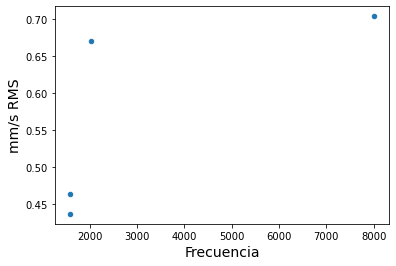

In [37]:
datos.plot.scatter(x='Frecuencia', y='mm/s RMS')
plt.xlabel('Frecuencia', fontsize='14')
plt.ylabel('mm/s RMS', fontsize='14')
plt.show()